1. Нужно понять каким компаниям указанные менеджеры продают больше, стараются звонить чаще.  
2. Каким клиентам мы продаем чаще\ звоним чаще.  
3. Как можно анализировать 2 дата сета в совокупности? (с примером)  
4. Опишите как мы будем интегрировать модель с нашим сайтом\и (или) базой данных.  
 
Описание.
Это статистика по менеджерам и по клиентам годичной давности. 
 
1. Это срез по клиентам, кто работал  с кем и какой был достигнут результат  
2. Это срез по менеджерам, как работал, сколько звонил, каких результатов достигает в принципе. По этой таблице можно выделить - старается \ не старается. 


In [8]:
#Импорт системных библиотек
import warnings
warnings.simplefilter("ignore")
import time

#Импорт математических библиотек
import pandas as pd
import numpy as np
import math
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import r2_score
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split, KFold, ShuffleSplit, GridSearchCV
#from sklearn.metrics import accuracy_score
#import xgboost as xgb
#from xgboost.sklearn import XGBRegressor


#Импорт библиотек для визуализации
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix


#Импорт системных библиотек
import warnings
warnings.simplefilter("ignore")
import time

#Импорт математических библиотек
import pandas as pd
from scipy import stats
import numpy as np
import math
#from sklearn.linear_model import LinearRegression
#
#from sklearn.metrics import r2_score
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split, KFold, ShuffleSplit, GridSearchCV
#from sklearn.metrics import accuracy_score
#import xgboost as xgb
#from xgboost.sklearn import XGBRegressor
#Предобработка данных
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#Алгоритмы
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

#Визуализация
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix


from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

from IPython.display import HTML
import random

def hide_toggle(toggle_text = 'Toggle show/hide'):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'
    for_next=False
      # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)


hide_toggle('Библиотеки и вспомогательные функции')

# Задача 1

In [40]:
data_managers = pd.read_csv("analit1.csv", encoding = 'utf-8', sep=';')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(data_managers.dtypes)


#data_managers = pd.read_csv("analit1.csv", encoding = 'utf-8', sep=';')
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(data_managers['Менеджер'].value_counts())

Менеджер                                                                                                                                                                    object
Год                                                                                                                                                                          int64
Месяц                                                                                                                                                                        int64
Количество месяцев которые человек уже работает в компании                                                                                                                   int64
Количество компаний с которыми был разговор с ЛПР в текущем месяце разделить на количество разговоров с ЛПР всего в текущем месяце                                         float64
Среднее количество разговоров с 1 компанией                                                              

In [56]:
KlasterData1

0      324772.0
1      100455.0
2      502740.0
3      233400.0
4      139070.0
         ...   
464         NaN
465         NaN
466         NaN
467         NaN
468         NaN
Name: Сумма заключенных договоров, Length: 469, dtype: float64

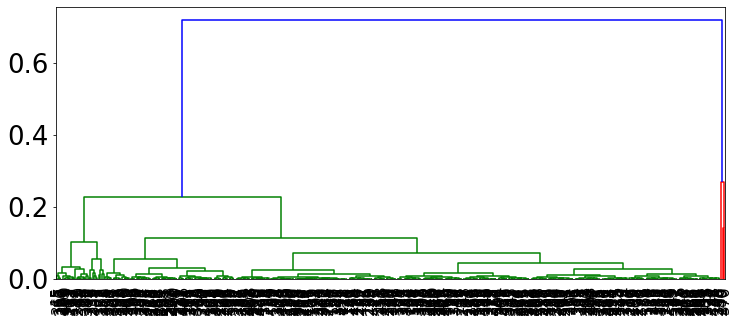

In [70]:
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

KlasterMethod = 'average'
wantColumns = 'Сумма заключенных договоров'
df = data_managers.copy()
KlasterData1 = df.loc[0:, wantColumns]
KlasterData1 = KlasterData1.dropna()
KlasterData =KlasterData1.values.reshape(-1, 1)
#KlasterData = KlasterData.dropna(wantColumns)

# Исключаем информацию об образцах, сохраняем для дальнейшего использования
#varieties = list(range(1, len(df.loc[0:, wantColumns[0]])+1)) 

scaler = MinMaxScaler()
scaler.fit(KlasterData)
NormKlasterData =pd.DataFrame(scaler.transform(KlasterData))

# Извлекаем измерения как массив NumPy
samples = NormKlasterData.values

# # Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method=KlasterMethod, metric = 'euclidean')
nodes = fcluster(mergings, 4, criterion="maxclust")

# Строим дендрограмму, указав параметры удобные для отображения
fig, ax = plt.subplots(figsize=(12,5)) 
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=15,
           ax=ax)
plt.show()

In [71]:
print(float(silhouette_score(samples , nodes, metric='euclidean')))

0.6567794368403491


In [66]:
mergings

array([[1.10000000e+01, 1.49000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.20000000e+01, 5.40000000e+01, 0.00000000e+00, 2.00000000e+00],
       [7.60000000e+01, 1.44000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [8.45000000e+02, 8.46000000e+02, 2.28407136e-01, 4.23000000e+02],
       [1.59000000e+02, 8.47000000e+02, 2.68131215e-01, 3.00000000e+00],
       [8.48000000e+02, 8.49000000e+02, 7.19732599e-01, 4.26000000e+02]])

In [67]:
nodes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Задача 2

In [2]:

data_clients = pd.read_csv("analit2.csv", encoding = 'utf-8', sep=';')

#display(data_managers.head())
#display(data_managers.info())

print('Количество уникальных компаний')
display(len(data_clients['Компания'].unique()))

Количество уникальных компаний


76380

**Подготовка данных**  

Создадим колонку, в которой отметим состоялась ли сделка.  
Удалим колонки, в которых более 30% пропусков.

In [4]:
#добавление целевой переменной
df_preparation = data_clients.copy()
df_preparation['Была продажа'] = pd.notna(df_preparation['Дата счета'])
df_preparation['Была продажа'] = df_preparation['Была продажа'].astype(int)
df_preparation['Была продажа'].value_counts()

#удаление колонок с более 30% пропусками
L = len(df_preparation)
for i in data_clients.columns.values:
    if df_preparation[i].isna().sum()/L>0.7:
        del df_preparation[i]

df_preparation = df_preparation.drop(['Компания', 'Инн', 'Регион', 'Ответственный', 'Правовая форма'], axis=1, inplace=False)        
        
print('Результат фильтрации')
print(len(df_preparation.columns.values))
print(df_preparation.columns.values)
print(df_preparation['Была продажа'].value_counts())

Результат фильтрации
43
['Сумма по экологии за 1 человека' 'Сумма по отходам за 1 человека'
 'Сумма по охране труда за 1 человека' 'Сумма по ГО и ЧС за 1 человека'
 'Сумма по Пожарной безопасности за 1 человека'
 'Сумма по 44 ФЗ за 1 человека'
 'Сумма по Медицинская помощь за 1 человека'
 'Сумма по Энергосбережение за 1 человека' 'Количество проверок'
 'Бывшие руководители количество' 'Количество учредителей\\акционеров'
 'Дочерние Юр.Лица количество' 'Дочерние компании количество'
 'Количество разговоров c ЛПР' 'Количество записей'
 'Количество записей - Не было разговоров'
 'Количество пустых попыток дозвониться  на 1 разговор с ЛПР. (Делим попытки на количество разговоров с ЛПР)'
 'Количество разговоров с компанией в статусе признают, но без сроков'
 'Количество разговоров в статусе пытаются разобраться в статьях'
 'Количество понижений 5го статуса в компании'
 'Количество повышений статуса в компании' 'Сколько необученных'
 'Сколько обученных' 'Сколько направлений обученных'
 'Скол

## Обучение

In [27]:
from xgboost import XGBClassifier

y = df_preparation['Была продажа'].copy()
X = df_preparation.drop(['Была продажа'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [28]:
y_pred_svm = model.predict(X_test)

display(roc_auc_score(y_test, y_pred_svm))
display(precision_score(y_test, y_pred_svm))
display(recall_score(y_test, y_pred_svm))

0.964270300237137

0.9946714031971581

0.9286898839137645

In [19]:
df_preparation.feature_names

AttributeError: 'DataFrame' object has no attribute 'feature_names'

In [37]:
model.feature_importances_

array([0.25283885, 0.086776  , 0.25251788, 0.06445595, 0.09024286,
       0.        , 0.06158562, 0.02500833, 0.03742409, 0.00156064,
       0.00571833, 0.00363948, 0.        , 0.00276677, 0.00248128,
       0.00228948, 0.00231002, 0.00283288, 0.00371228, 0.00274177,
       0.00355408, 0.02066072, 0.00713034, 0.00230213, 0.00208805,
       0.0032661 , 0.00560071, 0.02486281, 0.00277652, 0.00277468,
       0.00267913, 0.00233719, 0.00262838, 0.00136518, 0.00287472,
       0.00227456, 0.        , 0.        , 0.00214885, 0.0011569 ,
       0.00451074, 0.00210561], dtype=float32)

Text(0.5, 0, 'Xgboost Feature Importance')

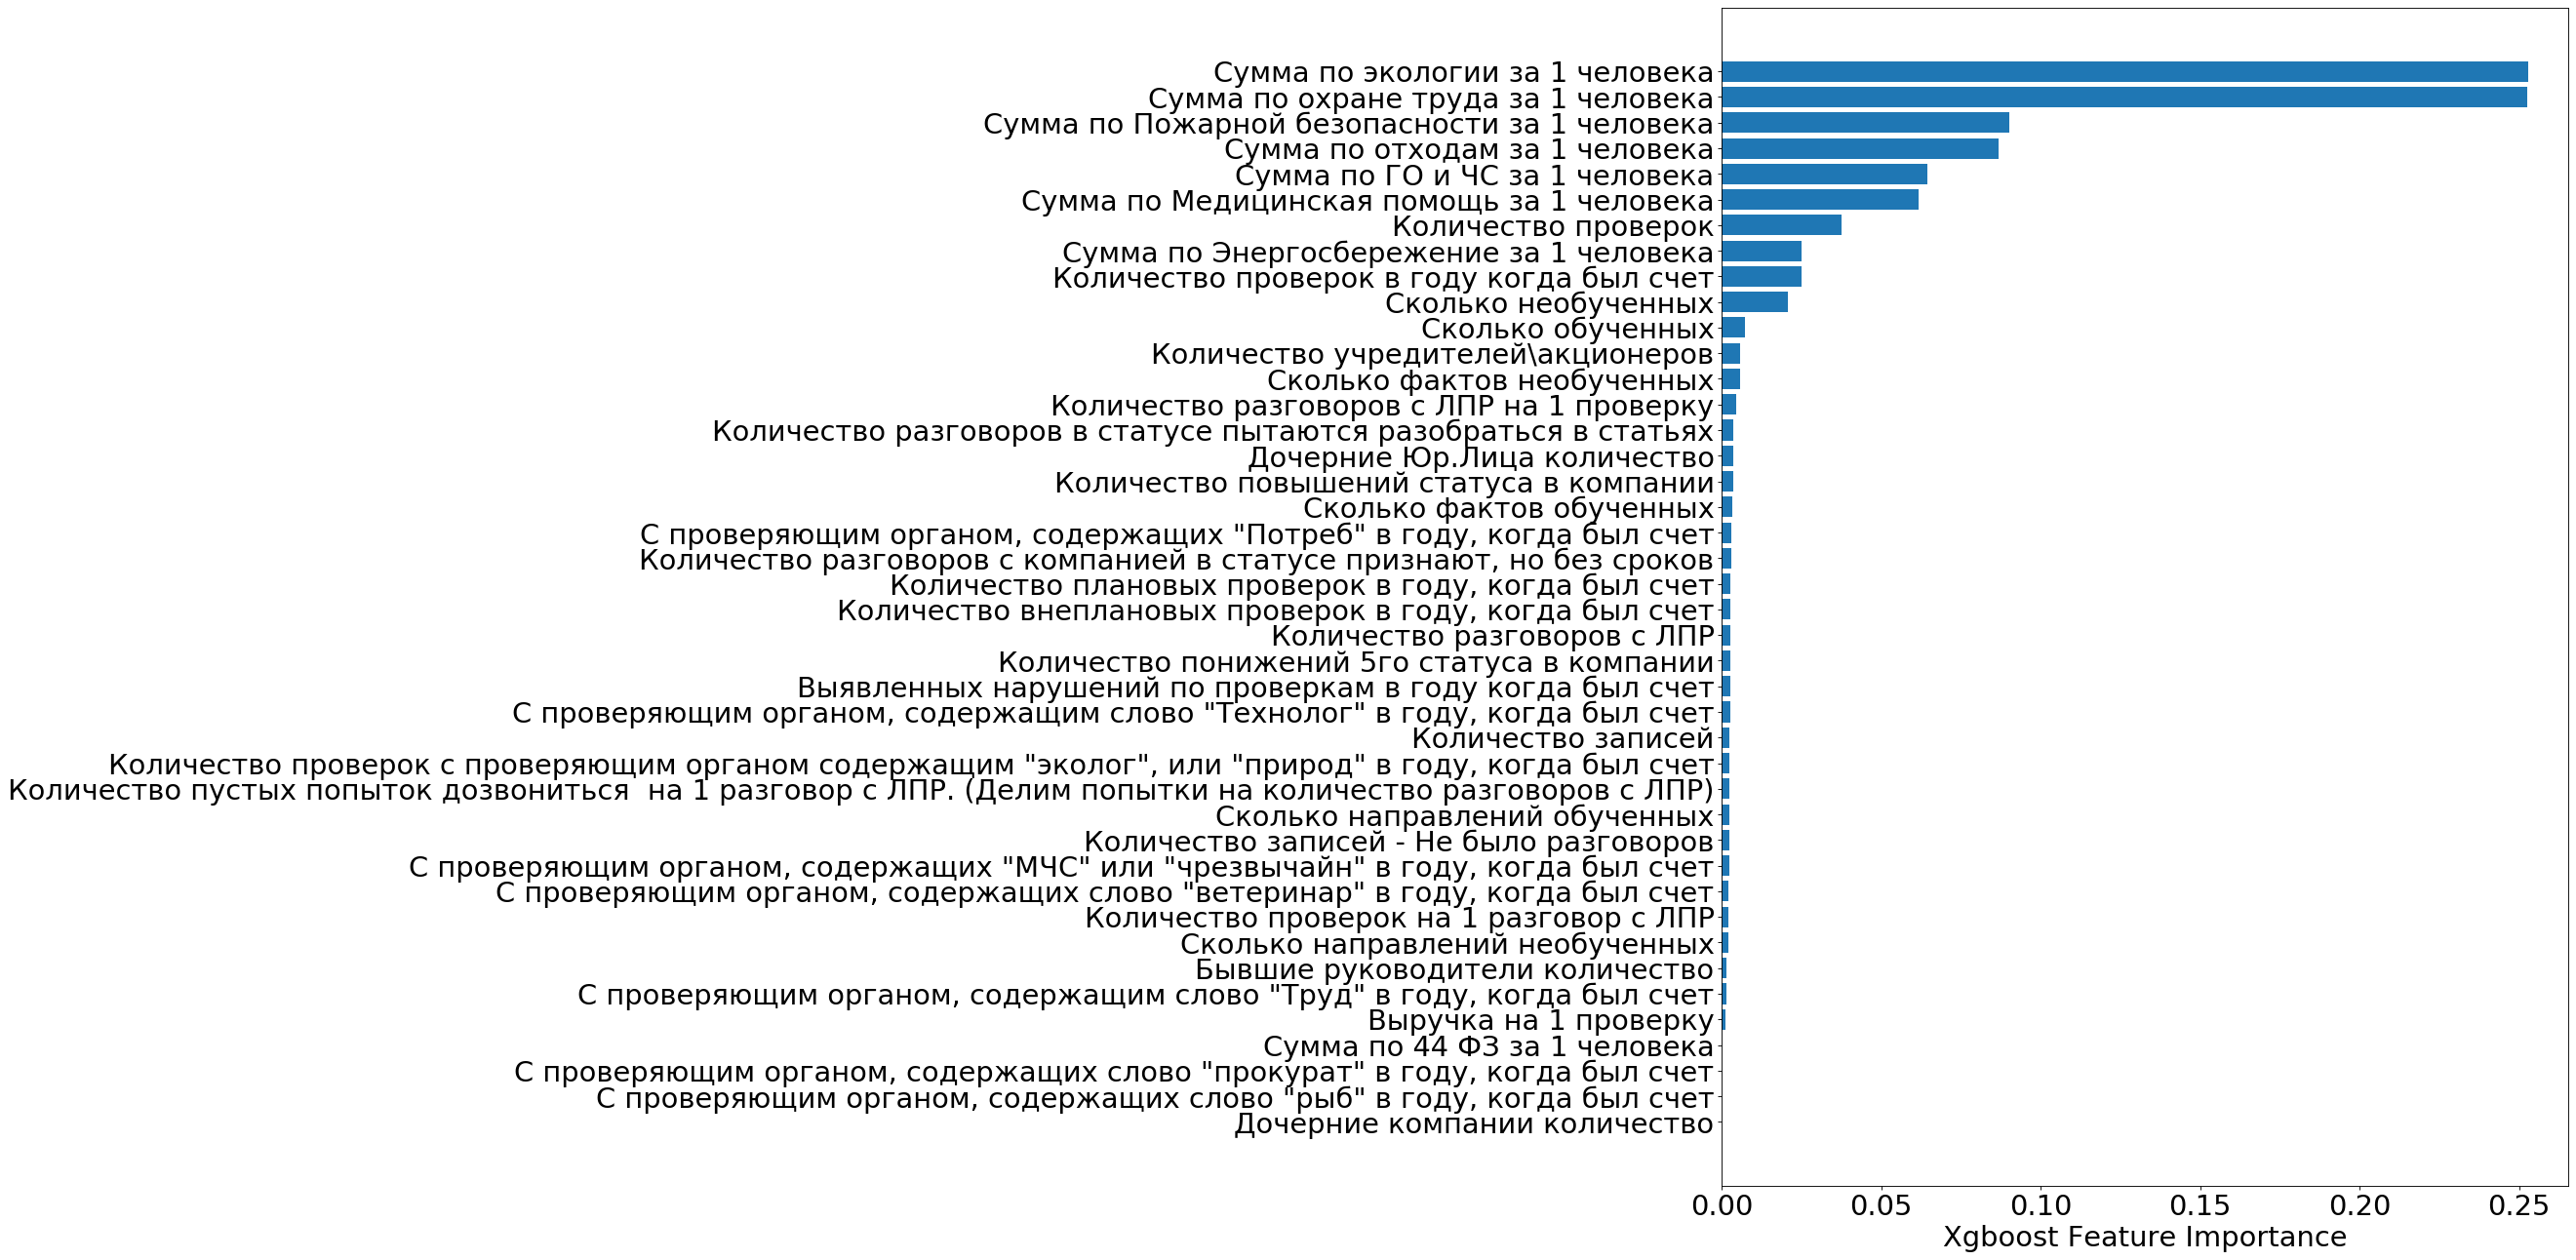

In [36]:
from matplotlib.pyplot import figure
plt.rcParams.update({'font.size': 26})
figure(figsize=(14, 20), dpi=80)

sorted_idx = model.feature_importances_.argsort()
plt.barh(df_preparation.columns.values[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

Матрица ошибок


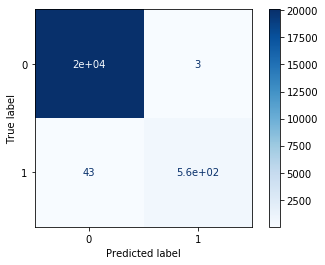

In [29]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues) 
print('Матрица ошибок')
plt.show()

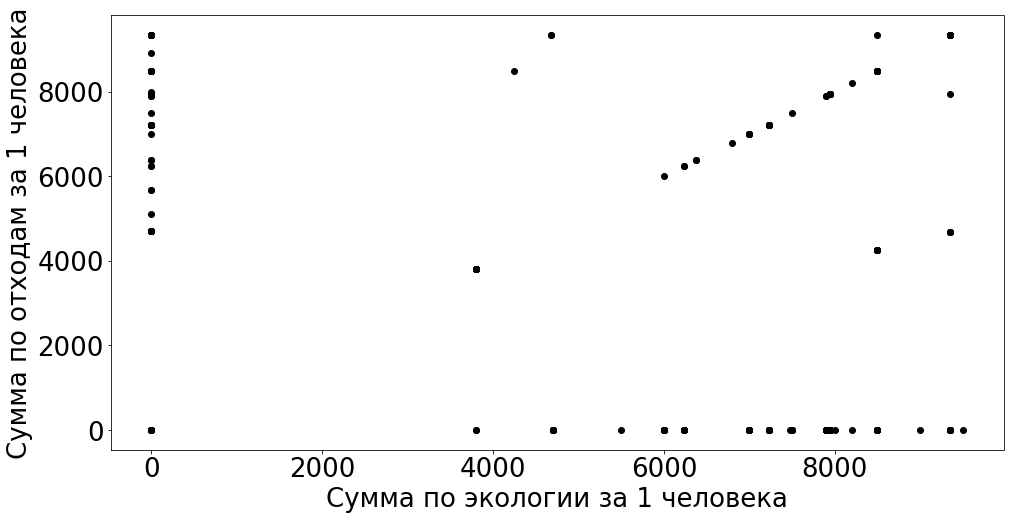

In [39]:
feature = 'Сумма по экологии за 1 человека'
target = 'Сумма по отходам за 1 человека'

plt.figure(figsize=(16, 8))
plt.scatter(
        df_preparation[feature],
        df_preparation[target],
        c='black'
    )
plt.xlabel(feature)
plt.ylabel(target)
plt.show()

In [5]:
#удаление выбросов по первым 13 переменным
#j = 0
#for i in df_preparation.columns.values:
#    j = j + 1
#    if j<13:       
#        df_preparation = df_preparation[(np.abs(stats.zscore(df_preparation[i])) < 1)]
#        display(i, df_preparation['Была продажа'].value_counts())
        


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
LinearDiscriminantAnalysis()
print(clf.predict([[-0.8, -1]]))
clf.coef_

In [ ]:
data_scoring_train_simple = data_scoring_train.drop(['Customer ID', 'Loan ID', 'Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis=1, inplace=False)

y = data_scoring_train_simple['Loan Status']
X = data_scoring_train_simple.drop(['Loan Status'], axis=1, inplace=False)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf_svm = SVC(C=1, max_iter=10000)

clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)

display(roc_auc_score(y_test, y_pred_svm))
display(precision_score(y_test, y_pred_svm))
display(recall_score(y_test, y_pred_svm))

50

In [46]:
len(data_clients.columns.values)


96

In [4]:
print(data_clients.columns.values)

['Счет номер' 'Дата счета' 'Компания' 'Инн'
 'Размер продажи в сумме по клиенту' 'Размер продажи в количестве человек'
 'Размер продажи по экологии в сумме'
 'Размер продажи по экологии в количестве человек'
 'Сумма по экологии за 1 человека' 'Размер продажи по отходам в сумме'
 'Размер продажи по отходам в количестве человек'
 'Сумма по отходам за 1 человека' 'Размер продажи по охране труда в сумме'
 'Размер продажи по охране труда в количестве человек'
 'Сумма по охране труда за 1 человека' 'Размер продажи по ГО и ЧС в сумме'
 'Размер продажи по ГО и ЧС в количестве человек'
 'Сумма по ГО и ЧС за 1 человека'
 'Размер продажи по Пожарной безопасности в сумме'
 'Размер продажи по Пожарной безопасности в количестве человек'
 'Сумма по Пожарной безопасности за 1 человека'
 'Размер продажи по 44 ФЗ в сумме'
 'Размер продажи по 44 ФЗ в количестве человек'
 'Сумма по 44 ФЗ за 1 человека'
 'Размер продажи по Медицинская помощь в сумме'
 'Размер продажи по Медицинская помощь в количестве чело

In [12]:
data_managers['Сумма заключенных договоров'].mean(), data_managers['Сумма заключенных договоров'].median(), max(data_managers['Сумма заключенных договоров']), min(data_managers['Сумма заключенных договоров'])

(147150.02582159624, 118155.0, 1380630.0, 0.0)